# XGBoost

## Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Files
from util import fetchOnlineData, create_dataset
from indicators import get_indicators

sns.set(font_scale = 1.5)

## Initial variables

In [2]:
symbol = "AABA"

# We'll look back 365 days
start_d = dt.date.today() - dt.timedelta(365)

## Import dataset

In [3]:
yesterday = dt.date.today() - dt.timedelta(1)
portf_value = fetchOnlineData(start_d, symbol, yesterday, del_cols=True)

[*********************100%***********************]  1 of 1 downloaded


# k-fold Cross Validation using XGBoost

In [4]:
# Create dataset
dataset = portf_value.copy()
dataset['date'] = portf_value.index
dataset.set_index('date', inplace=True)
dataset.rename(columns={'Adj Close': symbol}, inplace=True)

## Compute the Predictor variables

In [5]:
# Get indicators
sym_mom, sma, q, rsi_value, rm = get_indicators(dataset, symbol)


# Compute momentum column
dataset['Momentum'] = sym_mom

# compute RSI column
dataset['RSI'] = rsi_value

# Clean nan values
dataset = dataset.fillna(0)

# Sort dataframe by index
dataset.sort_index()

date
2018-03-06    0.007776
2018-03-07    0.011583
2018-03-08    0.002781
2018-03-09   -0.014660
2018-03-12   -0.006660
2018-03-13   -0.002102
2018-03-14    0.031396
2018-03-15    0.077027
2018-03-16    0.099188
2018-03-19    0.059913
2018-03-20    0.051882
2018-03-21    0.027507
2018-03-22   -0.015318
2018-03-23   -0.047246
2018-03-26   -0.022563
2018-03-27   -0.038700
2018-03-28   -0.059067
2018-03-29   -0.067741
2018-04-02   -0.103880
2018-04-03   -0.093911
2018-04-04   -0.120779
2018-04-05   -0.111310
2018-04-06   -0.094140
2018-04-09   -0.062466
2018-04-10   -0.066350
2018-04-11   -0.033959
2018-04-12   -0.028910
2018-04-13   -0.064155
2018-04-16   -0.023464
2018-04-17    0.007940
                ...   
2019-01-04    0.017678
2019-01-07    0.051666
2019-01-08    0.096855
2019-01-09    0.129779
2019-01-10    0.089983
2019-01-11    0.084699
2019-01-14    0.067524
2019-01-15    0.083535
2019-01-16    0.111324
2019-01-17    0.158473
2019-01-18    0.100817
2019-01-22    0.056506
2019-0

,AABA,Momentum,RSI
date,,,
2018-02-20,74.589996,0.000000,39.301843
2018-02-21,75.110001,0.000000,39.301843
2018-02-22,75.519997,0.000000,39.301843
2018-02-23,77.760002,0.000000,39.301843
2018-02-26,78.080002,0.000000,39.301843
2018-02-27,76.129997,0.000000,39.301843
2018-02-28,74.849998,0.000000,39.301843
2018-03-01,73.739998,0.000000,34.299793
2018-03-02,72.690002,0.000000,30.075454


## Scale data for using reg:logistic
If we want use objective = reg: if we want use objective = reg:logistic logistic regression, the label needed to be pre-scaled into [0,1]. logistic regression, the label needed to be pre-scaled into [0,1].

In [ ]:
# Scale the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
np_scaled = scaler.fit_transform(dataset)
dataset_normalized = pd.DataFrame(np_scaled)
dataset_normalized

In [ ]:
it = scaler.inverse_transform(dataset_normalized)


## Setup the Target variable or the desired output.

In [7]:
X, y = dataset_normalized.iloc[:,:-1], dataset_normalized.iloc[:,-1]

## Create XGBoost DMatrix structure

In [8]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
print(data_dmatrix.get_label())

## Optimize parameters

In [10]:
print("Parameter optimization")

xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200],
                    'learning_rate': [0.01, 0.1, 0.5],
                    'min_samples_split':range(200,1001,2000)}, verbose=1)
clf.fit(X,y)
print('Best Score: ', clf.best_score_)
print('Best params: ', clf.best_params_)

Parameter optimization
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Score:  0.5609366516472766
Best params:  {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 200, 'n_estimators': 50}


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    7.0s finished


## Create a hyper-parameter dictionary

We will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because you will use num_boost_rounds instead.

In [11]:
params = {'silent':1,
          "objective":"reg:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 4,
          'alpha': 10}

We will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame. Note that here you are using the Dmatrix object you created before.

In [12]:
cv_results = xgb.cv(verbose_eval=True,
                    dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3,
                    num_boost_round=200,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123,)

[0]	train-rmse:0.229774+0.00463501	test-rmse:0.229666+0.00942093
[1]	train-rmse:0.229774+0.00463501	test-rmse:0.229666+0.00942093
[2]	train-rmse:0.229774+0.00463501	test-rmse:0.229666+0.00942093
[3]	train-rmse:0.228612+0.00566454	test-rmse:0.228849+0.00887777
[4]	train-rmse:0.226261+0.00721067	test-rmse:0.22697+0.00751696
[5]	train-rmse:0.223532+0.00578829	test-rmse:0.224486+0.00888512
[6]	train-rmse:0.221565+0.00718886	test-rmse:0.222927+0.00784485
[7]	train-rmse:0.22019+0.00525123	test-rmse:0.221643+0.00963835
[8]	train-rmse:0.219393+0.0058108	test-rmse:0.221084+0.00917102
[9]	train-rmse:0.218165+0.00408296	test-rmse:0.219945+0.0107781
[10]	train-rmse:0.215419+0.00367517	test-rmse:0.217634+0.0113162
[11]	train-rmse:0.213948+0.00471137	test-rmse:0.216477+0.0105423
[12]	train-rmse:0.213948+0.00471137	test-rmse:0.216477+0.0105423
[13]	train-rmse:0.212968+0.00332486	test-rmse:0.215579+0.0118017
[14]	train-rmse:0.212415+0.00376047	test-rmse:0.215191+0.0114815
[15]	train-rmse:0.211925+0.00

## cv_results contains train and test RMSE metrics for each boosting round.

In [13]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.229774,0.004635,0.229666,0.009421
1,0.229774,0.004635,0.229666,0.009421
2,0.229774,0.004635,0.229666,0.009421
3,0.228612,0.005665,0.228849,0.008878
4,0.226261,0.007211,0.226970,0.007517


## Extract and print the final boosting round metric.

In [14]:
print((cv_results["test-rmse-mean"]).tail(1))

165    0.197147
Name: test-rmse-mean, dtype: float64


You can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 0.19 per 1000$. 

You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters. 

## Instantiate an XGBoost regressor object

In [15]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

## Plotting the first tree

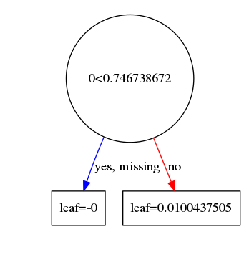

In [16]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [8, 6]
plt.show()

## Visualize your XGBoost models

It's to examine the importance of each feature column in the original dataset within the model.

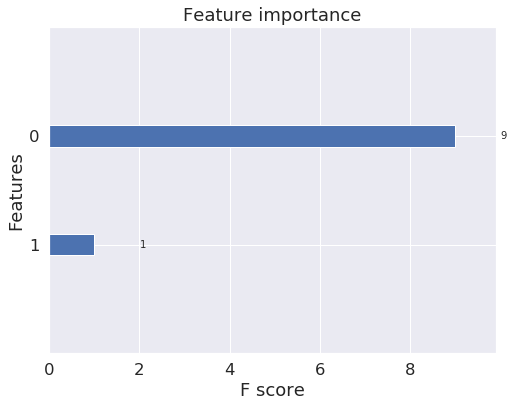

In [17]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [18, 6]
plt.show()

## Instantiate an XGBoost regressor object

## Split the data

In [75]:
# Define X and y
feature_cols = ['Momentum', 'RSI']
X = dataset[feature_cols]
y = dataset[symbol]

In [76]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

## Scale data for using reg:logistic
If we want use objective = reg: if we want use objective = reg:logistic logistic regression, the label needed to be pre-scaled into [0,1]. logistic regression, the label needed to be pre-scaled into [0,1].

In [77]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

In [110]:
xg_reg = xgb.XGBRegressor(**params)

## Fit the regressor to the training set

In [151]:
xg_reg.fit(X_train_scaled,y_train_scaled)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1)

## Make predictions on the test set

In [166]:
preds = xg_reg.predict(X_test_scaled)

## Compute the rmse

In [167]:
rmse = np.sqrt(mean_squared_error(y_test_scaled, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.209037


## Plotting

### Standarize data 

In [168]:
preds = scaler.inverse_transform([preds])


In [ ]:
# Convert array to series
mylist = preds.tolist()
se = pd.Series(mylist)


In [184]:
# Create a dataframe for plotting
predictions = pd.DataFrame()
predictions['Price'] = y_test
predictions['Forecast'] = se[0]


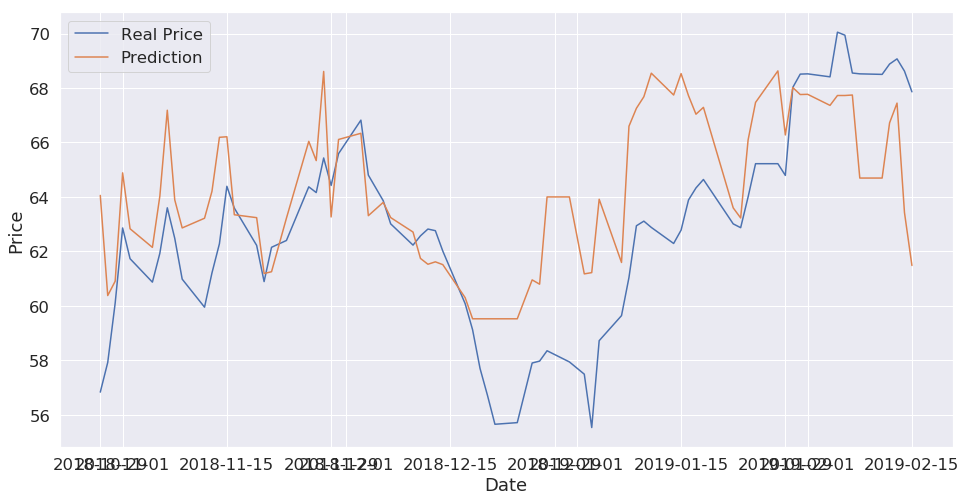

In [186]:
plt.figure(figsize=(16,8))
plt.plot(predictions)
plt.xlabel('Date')
plt.ylabel("Price")
plt.legend(["Real Price", "Prediction"])
plt.show()